In [32]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
del df['User ID']

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:


le = LabelEncoder()

In [9]:
le.fit(df['Gender'])

LabelEncoder()

In [11]:
df['Gender'] = le.transform(df['Gender'])

In [12]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
X = df[['Gender',	'Age',	'EstimatedSalary']]
Y = df['Purchased']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train,y_train)

pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.8125

#Hyperparameter Tuning

In [38]:
neighbors = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [41]:
accuracy = []

In [42]:
for k in neighbors:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracy.append(acc)
  print(k , acc)

3 0.8
4 0.8
5 0.825
6 0.775
7 0.8125
8 0.775
9 0.8
10 0.775
11 0.8
12 0.775
13 0.75
14 0.7625
15 0.775
16 0.75
17 0.775
18 0.7625
19 0.7625
20 0.75


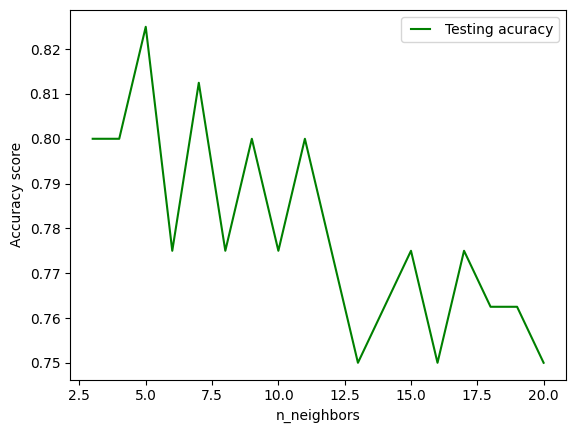

In [46]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


line1,=plt.plot(neighbors,accuracy,'g',label="Testing acuracy")
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})

plt.ylabel('Accuracy score')
plt.xlabel('n_neighbors')
plt.show()

#Train model with final hyperparameter values

In [47]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Model accuracy is : ",acc)

Model accuracy is :  0.825
